In [1]:
#Problem2

In [2]:
k = "k"
print(k*9, "\t", k, sep='')
for i in range(3):
    print("\t", k, "\t", k, sep='')
print("\t", k*9, sep='')
for t in range(2):
    print("\t",k,"\t", k, sep='')
print("\t", k*9, sep='')

kkkkkkkkk	k
	k	k
	k	k
	k	k
	kkkkkkkkk
	k	k
	k	k
	kkkkkkkkk


In [3]:
#Problem3

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import random

def find_idx(char, txt):
    return [i for i in range(len(txt)-4) if txt[i] == char]

def filter(idx_list, txt, cache, n=1):
    if n==6:
        return idx_list
    res = [idx for idx in idx_list if txt[idx+n]==cache[n]]
    n += 1
    return filter(res, txt, cache, n)

def solution():
    arr = list(np.random.randint(0, 10, size=1000000))
    txt = ''.join( str(_) for _ in arr)
    key = "340029"
    cache = {i:key[i] for i in range(len(key))}
    total = filter(find_idx('3', txt), txt, cache)
    return len(total)>0


In [23]:
real=0
for i in range(500):
    real+=solution()
real /=500 # res는 real probability
print(real)


0.626


In [6]:

#수학적 확률
#각 자리수에서 340029가 나오지 않을 확률은 9/10이므로 (9/10)^6.
'''
수가 커서 시행 불가능함.
p = (9/10)**6
result = 1 - p**(1000000-5)
print(result)
'''
print(1-(999999/1000000)**999995)

0.6321189033771292


In [7]:
#Problem4

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('housing.csv')
print(data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

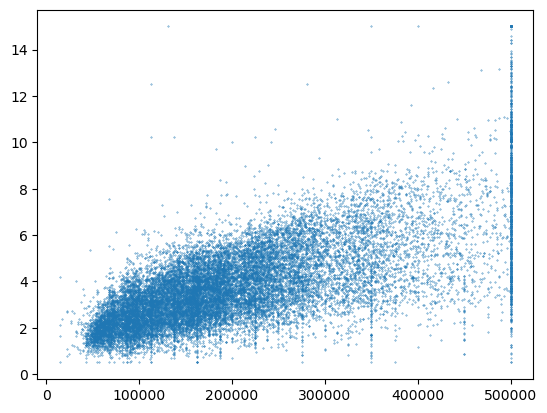

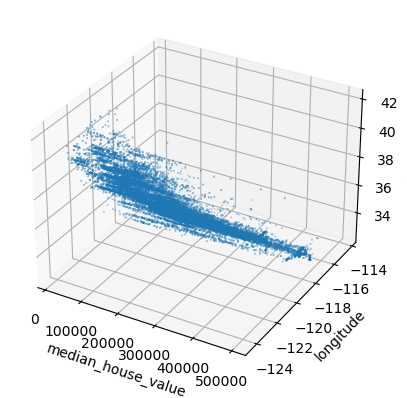

In [9]:
from mpl_toolkits.mplot3d import Axes3D

name = ["median_house_value", "median_income", "longitude", "latitude"]
x_data1 = data[name[0]].loc[:]
y_data1 = data[name[1]].loc[:]
plt.scatter(x_data1, y_data1, s = 0.1) #점 크기는 0.1로

#3개의 데이터셋 정리하기
x_data2 = data[name[0]].loc[:]
y_data2 = data[name[2]].loc[:]
z_data2 = data[name[3]].loc[:]


# 3D 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#라벨 설정
ax.set_xlabel('median_house_value')
ax.set_ylabel('longitude')
ax.set_zlabel('latitude')
ax.scatter(x_data2, y_data2, z_data2, s=0.1)
plt.show()

In [10]:
#랜덤하게 반으로 나누기
data_a = data.sample(frac=0.5)
data_b = data.drop(data_a.index)
#상관계수 구하기(피어슨 상관계수)
corr1 = np.corrcoef(data_a[name[0]], data_a[name[1]])
corr2 = np.corrcoef(data_b[name[0]], data_b[name[1]])
print(corr1)
print(corr2)

[[1.         0.68830583]
 [0.68830583 1.        ]]
[[1.         0.68771011]
 [0.68771011 1.        ]]


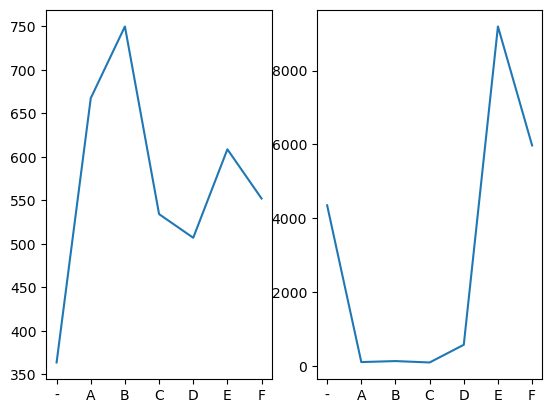

In [11]:
def categorize(val):
    if val<1:
        return "-"
    if val<1.05:
        return "F"
    if val<1.3:
        return "E"
    if val<1.7:
        return "D"
    if val<2:
        return "C"
    if val<3:
        return "B"
    else:
        return "A"
name2 = ['total_bedrooms', 'households']
x = ["level 1", "level 2", "level 3", "level 4", "level 5"]
data['household'] = data[name2[0]]/data[name2[1]]
#각각 household마다 라벨 붙임
data['label'] = [categorize(x) for x in data['household']]
fig, axes = plt.subplots(1,2)
#아래의 각각 mean(평균)을 표현한 것
axes[0].plot(data.groupby('label')['total_bedrooms'].mean())
#아래의 각각 frequency(빈도)를 표현한 것
axes[1].plot(data.groupby('label')['total_bedrooms'].count())


In [12]:
#5번 문제
def d_m(mat1, mat2):
    #행렬의 사이즈 조사 
    m, n = np.shape(mat1)[0], np.shape(mat2)[1]
    res=np.ones((m,n))
    #해당 위치별로 나눠주기
    for i in range(m):
        for j in range(n):
            if mat1[i][j] == 0 or mat2[i][j]==0:
                continue
            res[i][j]=mat1[i][j]/mat2[i][j]
    return res

def m_mt(mat):
    #0으로 채워두고 채우기
    m, n = np.shape(mat)[0], np.shape(mat)[1]
    res=np.zeros((m,m))
    for i in range(m):
        for j in range(m):
            for t in range(n):
                res[i][j]+=mat[i][t]*mat.transpose()[t][j]               
    return res

x = list("20021121")
y = list("20213400")
mat = np.array([x,y], dtype = 'int')
#각 위치별 사칙연산
a = [mat + 7, mat - 7, mat * 7, np.add(mat, mat), d_m(mat, mat)]
#행렬끼리의 계산
b = [np.multiply(mat, mat), m_mt(mat.transpose()), m_mt(mat)]
print(a)
print(b)

[array([[ 9,  7,  7,  9,  8,  8,  9,  8],
       [ 9,  7,  9,  8, 10, 11,  7,  7]]), array([[-5, -7, -7, -5, -6, -6, -5, -6],
       [-5, -7, -5, -6, -4, -3, -7, -7]]), array([[14,  0,  0, 14,  7,  7, 14,  7],
       [14,  0, 14,  7, 21, 28,  0,  0]]), array([[4, 0, 0, 4, 2, 2, 4, 2],
       [4, 0, 4, 2, 6, 8, 0, 0]]), array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])]
[array([[ 4,  0,  0,  4,  1,  1,  4,  1],
       [ 4,  0,  4,  1,  9, 16,  0,  0]]), array([[ 8.,  0.,  4.,  6.,  8., 10.,  4.,  2.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 4.,  0.,  4.,  2.,  6.,  8.,  0.,  0.],
       [ 6.,  0.,  2.,  5.,  5.,  6.,  4.,  2.],
       [ 8.,  0.,  6.,  5., 10., 13.,  2.,  1.],
       [10.,  0.,  8.,  6., 13., 17.,  2.,  1.],
       [ 4.,  0.,  0.,  4.,  2.,  2.,  4.,  2.],
       [ 2.,  0.,  0.,  2.,  1.,  1.,  2.,  1.]]), array([[15., 13.],
       [13., 34.]])]


In [13]:
#6번문제
class student:
    #이름, 학번, 성별, 나이, 수강과목(리스트)
    def __init__(self, name, student_number, gender, age, courses):
        self.name = name
        self.student_number = student_number
        self.gender = gender
        self.age = age
        self.courses = courses
    
    #첫번째 이름만 대문자이도록 함
    def upper_only1(self):
        self.name = self.name.lower()
        self.name = self.name[0].upper() + self.name[1:]
    
    # 0년 뒤
    def after_years(self, years):
        self.age +=years
    
    #지우고 싶은 과목을 지운다
    def del_courses(self, number):
        if number > len(self.courses):
            print("errer")
        elif number == 0:
            print("error")
        else :
            del self.courses[number-1]

student1 = student('hAyan',2021340029, 'f',22,['Reinforcement learning', 'Psychology', 'Algorithm', 'Machine Learning', 'Espanol'])
student1.upper_only1()
student1.after_years(3)
student1.del_courses(2)
print(student1.__dict__)


{'name': 'Hayan', 'student_number': 2021340029, 'gender': 'f', 'age': 25, 'courses': ['Reinforcement learning', 'Algorithm', 'Machine Learning', 'Espanol']}
